# Hyperparameter Tuning and Pruning in Decision Trees - Lab

## Introduction

In this lab you will use the titanic dataset to see the impact of tree pruning and hyperparameter tuning on the predictive performance of a decision tree classifier. Pruning reduces the size of decision trees by removing nodes of the tree that do not provide much predictive power to classify instances. Decision trees are the most susceptible out of all the machine learning algorithms to overfitting and effective pruning can reduce this likelihood. 

## Objectives

In this lab you will: 

- Determine the optimal hyperparameters for a decision tree model and evaluate performance 

## Import necessary libraries

Let's first import the libraries you would need for this lab. 

In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
plt.style.use('seaborn')

## Import the data

The titanic dataset, available in `'titanic.csv'`, is all cleaned up and pre-processed for you, so that you can focus on pruning and optimization. Import the dataset and print the first five rows of the data: 

In [6]:
from fsds_100719.imports import *

In [17]:
# Import the data
df = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/dsc-tuning-decision-trees-lab-online-ds-ft-100719/master/titanic.csv')
df.head()


,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,1,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,0
1,2,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,1
2,3,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,1
3,4,35.0,1,0,53.1000,1,0,0,1,0,0,0,1,1
4,5,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,0


## Create training and test sets

- Assign the `'Survived'` column to `y` 
- Drop the `'Survived'` and `'PassengerId'` columns from `df`, and assign the resulting DataFrame to `X` 
- Split `X` and `y` into training and test sets. Assign 30% to the test set and set the `random_state` to `SEED` 

In [18]:
# Create X and y 
y = df['Survived']
X = df.drop(columns=['Survived','PassengerId'])

# Split into training and test sets
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=SEED)

X_train.shape, y_test.shape

((623, 12), (268,))

## Train a vanilla classifier

__Note:__ The term "vanilla" is used for a machine learning algorithm with its default settings (no tweaking/tuning).

- Instantiate a decision tree 
  - Use the `'entropy'` criterion and set the `random_state` to `SEED` 
- Fit this classifier to the training data 

In [19]:
# Train the classifier using training data
clf = DecisionTreeClassifier(criterion='entropy',random_state=SEED)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

## Make predictions 
- Create a set of predictions using the test set 
- Using `y_test` and `y_pred`, calculate the AUC (Area under curve) to check the predictive performance

In [28]:
# Make predictions using test set 
y_pred = clf.predict(X_test)

def get_roc_auc(y_true,y_pred):
    # Check the AUC of predictions
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true,y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    return roc_auc
get_roc_auc(y_test,y_pred)

0.7367718101733446

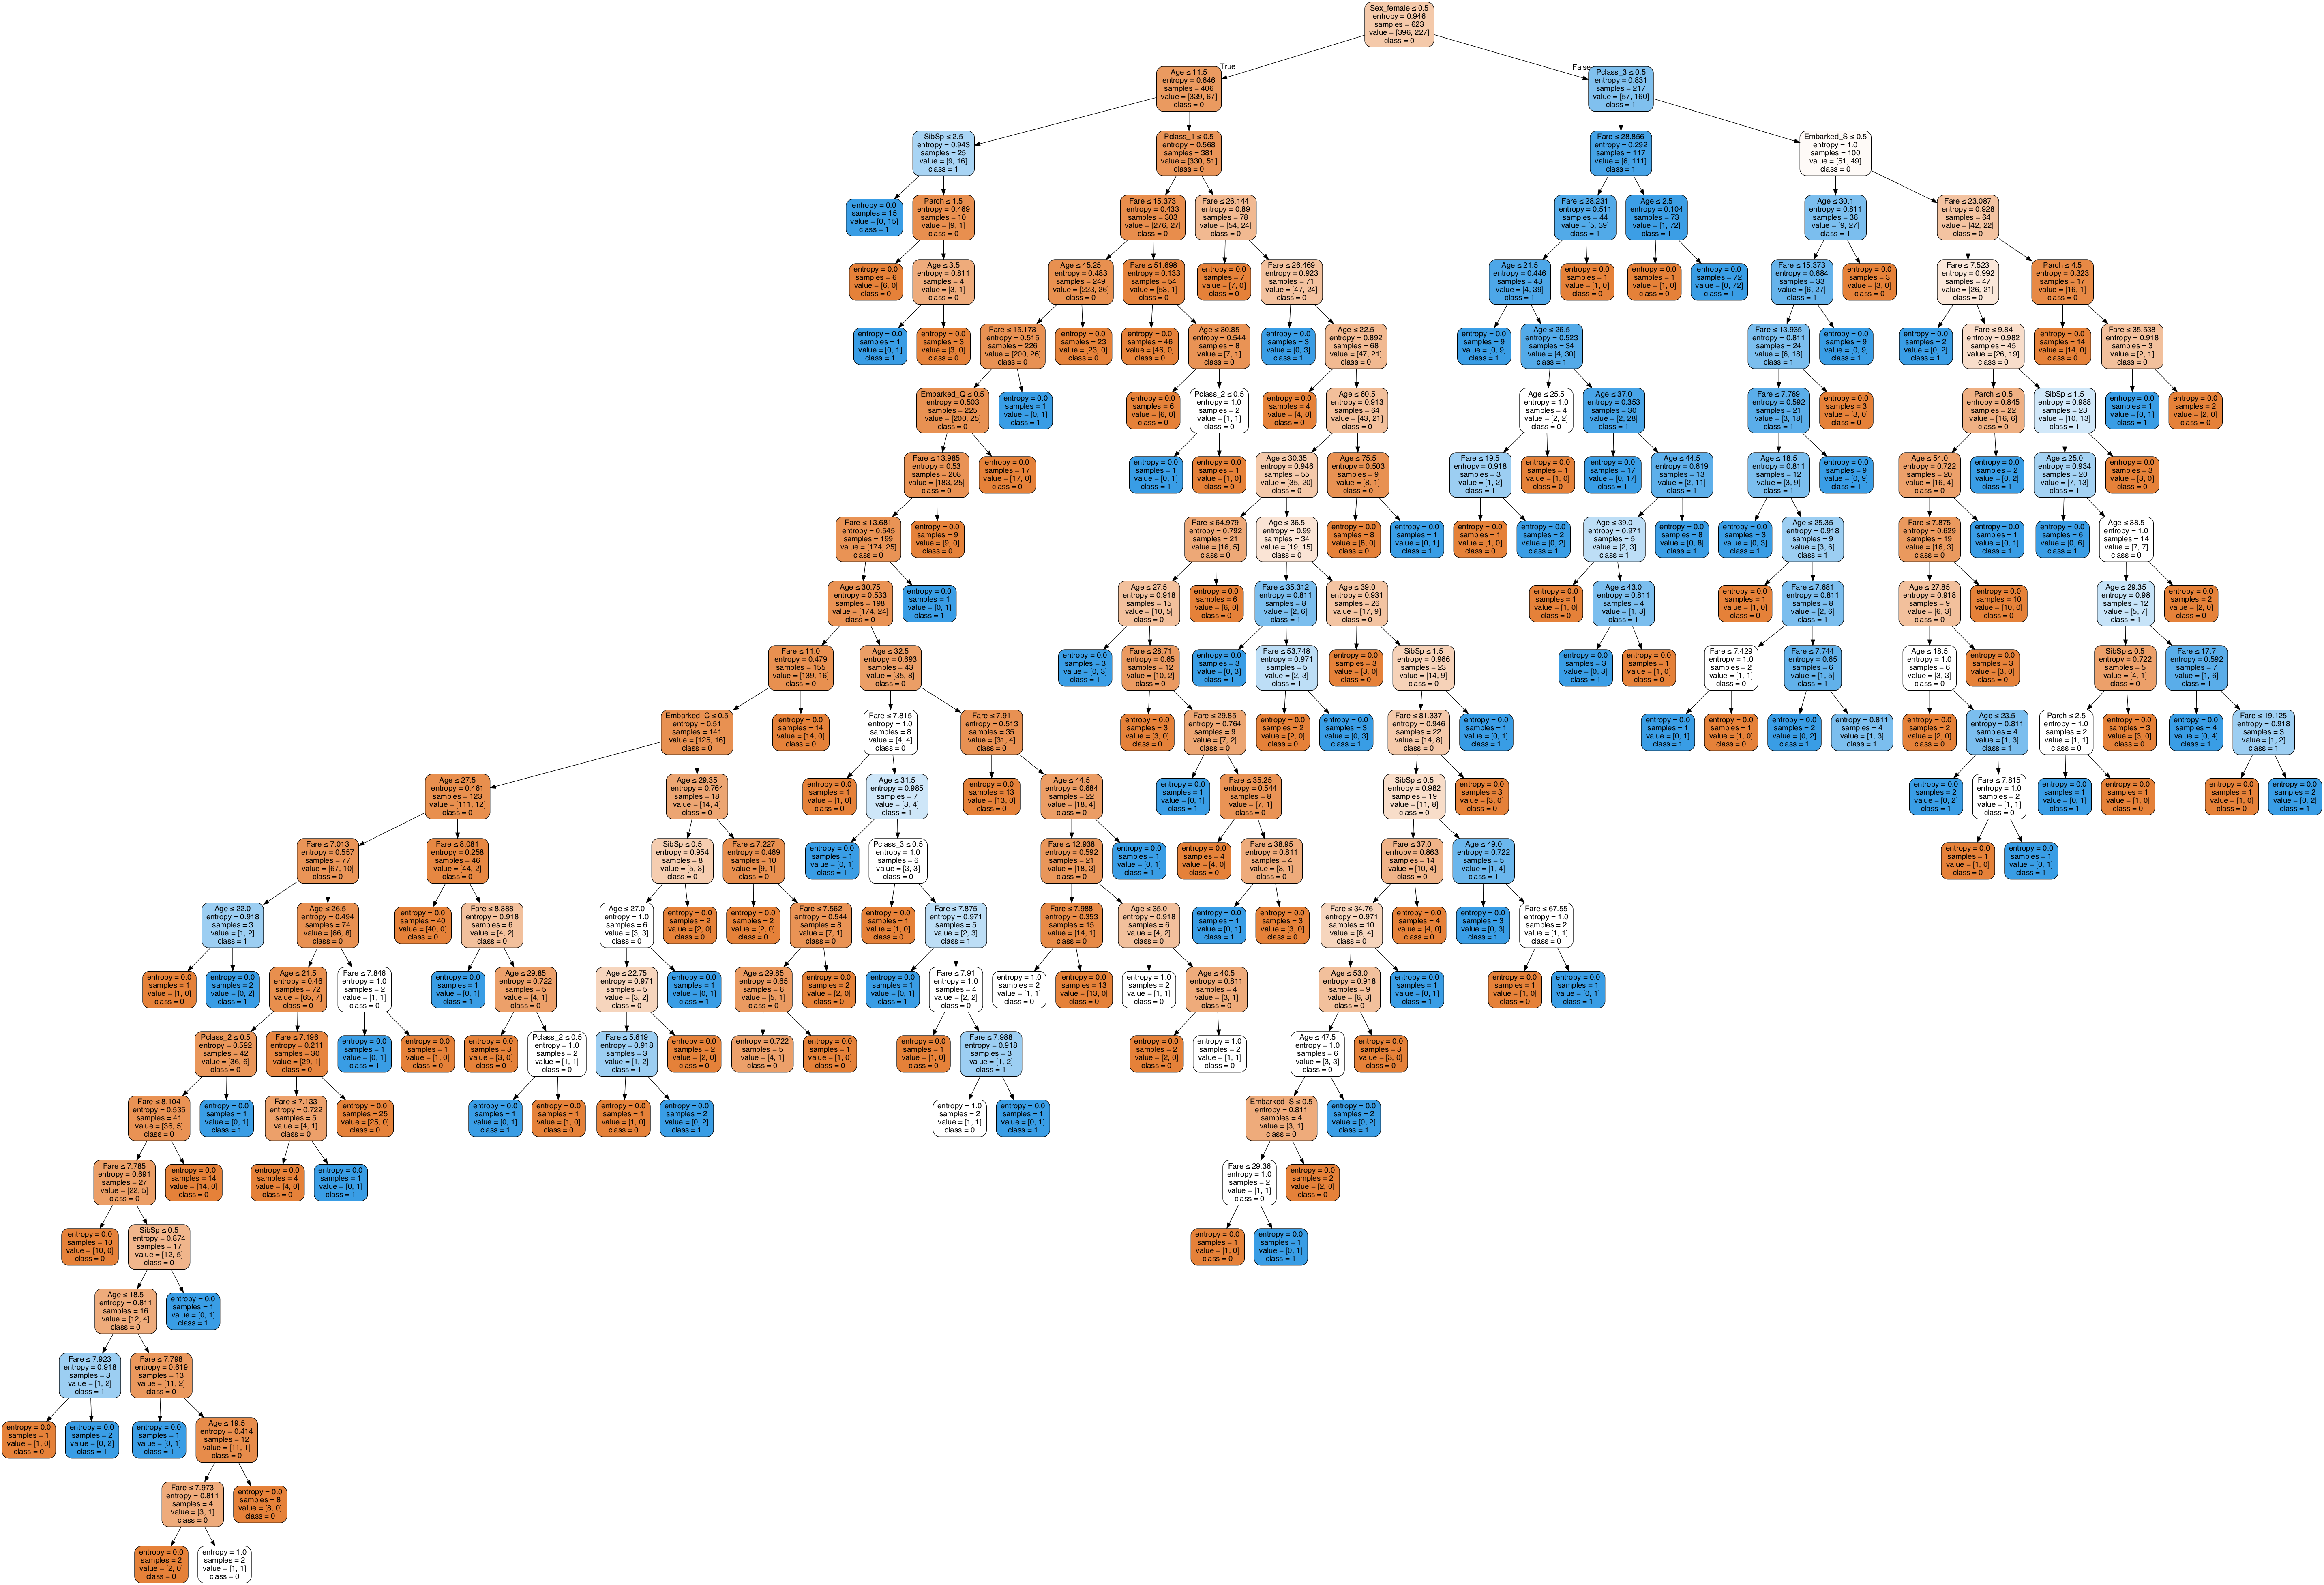

In [25]:
##


from IPython.display import Image  
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

# Create DOT data
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=X.columns,
                           class_names=np.unique(y).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

# Draw graph
graph = graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

## Maximum Tree Depth

Let's first check for the best depth parameter for our decision tree: 

- Create an array for `max_depth` values ranging from 1 - 32  
- In a loop, train the classifier for each depth value (32 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/over fitting and optimal value 
- Interpret the results 

In [35]:
# Identify the optimal tree depth for given data
max_depth = range(1,33)
min_samples_split = 


res = [['Data','Max Depth','ROC_AUC']]
for max_depth in max_depths:
    clf = DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)
    clf.fit(X_train, y_train)
    y_hat_test = clf.predict(X_test)
    y_hat_train = clf.predict(X_train)
    
    roc_auc_train = get_roc_auc(y_train, y_hat_train)
    roc_auc_test = get_roc_auc(y_test, y_hat_test)
    
    res.append(['Train',max_depth,roc_auc_train])
    res.append(['Test',max_depth,roc_auc_test])
    
df_res = pd.DataFrame(res[1:], columns=res[0])
df_res.sort_values('ROC_AUC', ascending=False).set_index(['Data', 'Max Depth'])

ROC_AUC
Data  Max Depth          
Train 25         0.985522
      24         0.985522
      32         0.985522
      31         0.985522
      30         0.985522
...                   ...
Test  22         0.735692
      17         0.734612
      16         0.733532
      23         0.732424
      2          0.702103

[64 rows x 1 columns]

In [38]:
df_res.sort_values('Max Depth', ascending=False)#.set_index(['Data', 'Max Depth'])

,Data,Max Depth,ROC_AUC
63,Test,32,0.735692
62,Train,32,0.985522
61,Test,31,0.736772
60,Train,31,0.985522
59,Test,30,0.738960
...,...,...,...
4,Train,3,0.818065
2,Train,2,0.760796
3,Test,2,0.702103
1,Test,1,0.738960


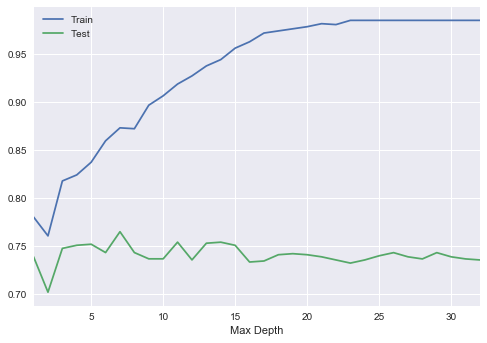

In [42]:
ax = df_res.groupby('Data').get_group('Train').plot(x='Max Depth', y='ROC_AUC',label='Train')

df_res.groupby('Data').get_group('Test').plot(x='Max Depth', y='ROC_AUC',ax=ax,label='Test')

In [ ]:
# You observations here 

## Minimum Sample Split

Now check for the best `min_samples_splits` parameter for our decision tree 

- Create an array for `min_sample_splits` values ranging from 0.1 - 1 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_splits` value (10 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/over fitting and optimal value 
- Interpret the results

In [51]:
# Identify the optimal min-samples-split for given data
# Identify the optimal tree depth for given data

grid = {'max_depth':[2,4,5]}
params=dict(max_depth = 2) #range(1,33

def check_params(res=None,**kwargs):

    if res is None:
        res = [['Data','Max Depth','ROC_AUC']]
#     var  = params.keys()
#     for k,val in params.items():
#         
    clf = DecisionTreeClassifier(criterion='entropy', **kwargs)
    clf.fit(X_train, y_train)
    y_hat_test = clf.predict(X_test)
    y_hat_train = clf.predict(X_train)

    roc_auc_train = get_roc_auc(y_train, y_hat_train)
    roc_auc_test = get_roc_auc(y_test, y_hat_test)

    res.append(['Train',max_depth,roc_auc_train])
    res.append(['Test',max_depth,roc_auc_test])
    return res


grid = {'max_depth':3}
for k,v in grid.items():
    
    check_params(res, **grid)
    

#     df_res = pd.DataFrame(res[1:], columns=res[0])
#     df_res.sort_values('ROC_AUC', ascending=False).set_index(['Data', 'Max Depth'])
res = check_params(**params)
res

[['Data', 'Max Depth', 'ROC_AUC'],
 ['Train', 32, 0.7607962888799894],
 ['Test', 32, 0.7021028701335607]]

In [46]:
# Your observations here

## Minimum Sample Leafs

Now check for the best `min_samples_leafs` parameter value for our decision tree 

- Create an array for `min_samples_leafs` values ranging from 0.1 - 0.5 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_leafs` value (5 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/over fitting and optimal value 
- Interpret the results

In [ ]:
# Calculate the optimal value for minimum sample leafs


In [ ]:
# Your observations here 


## Maximum Features

Now check for the best `max_features` parameter value for our decision tree 

- Create an array for `max_features` values ranging from 1 - 12 (1 features vs all)
- In a loop, train the classifier for each `max_features` value (12 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/over fitting and optimal value 
- Interpret the results

In [ ]:
# Find the best value for optimal maximum feature size


In [ ]:
# Your observations here

## Re-train the classifier with chosen values

So now we shall use the best values from each training phase above and feed it back to our classifier and see if have any improvement in predictive performance. 

- Train the classifier with optimal values identified 
- Compare the AUC with vanilla DT AUC 
- Interpret the results of comparison

In [ ]:
# Train a classifier with optimal values identified above
dt = None


false_positive_rate, true_positive_rate, thresholds = None
roc_auc = None
roc_auc

In [ ]:
# You observations here

In the next section, we shall talk about hyperparameter tuning using a technique called "grid-search" to make this process even more granular and decisive. 

## Summary 

In this lesson, we looked at tuning a decision tree classifier in order to avoid overfitting and increasing the generalization capabilities of the classifier. For the titanic dataset, we see that identifying optimal parameter values can result in some improvements towards predictions. This idea will be exploited further in upcoming lessons and labs. 